# LSTM-3

* all 9 feature vectors are considered
* `max` normalization
* entire data set considered

In [104]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import random
import pandas as pd
import keras
from keras import layers
import utils as ut
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [31]:
df = ut.data2()

no of rows:  (124494, 12)
Index(['d', 'm', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
after date aggregation per day:  (304, 11)
after event aggregation :  (282, 11)
fv:1, max:34245
fv:2, max:57422
fv:3, max:279251095
fv:4, max:144920186679
fv:5, max:13955
fv:6, max:920
fv:7, max:6228
fv:8, max:534856
fv:9, max:1380.0
SUCCESS


In [33]:
dg = df.copy()

fc = [str(e) for e in range(1,10)]
dx = dg[fc]
x = dx.to_numpy()

dy = dg[['e']]
y = dy.to_numpy()

dy = pd.get_dummies(dg['e'],prefix='e')
y = dy.to_numpy()

In [34]:
x.shape, y.shape

((282, 9), (282, 2))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2)

In [36]:
X_train.shape, y_train.shape

((188, 9), (188, 2))

In [37]:
X_test.shape, y_test.shape

((94, 9), (94, 2))

In [38]:
class M1:
    
    def __init__(self, n_input, n_units, n_output): 
        
        self.n_input = n_input
        self.n_units = n_units
        self.n_output = n_output
        self.comment = None

    def setcomment(self, msg):
        
        self.comment = msg
        
    def setmodel(self):

        model = Sequential()
        inputs = Input(shape=(1,n_input))
        model.add(inputs)

        lstm = LSTM(self.n_units, return_sequences=True, name="l1")
        model.add(lstm)

        lstm = LSTM(5, return_sequences=True, name="l2")
        model.add(lstm)

        dense = Dense(10, name="l3")
        model.add(dense)

        dense = Dense(self.n_output, activation='softmax', name="l4")
        model.add(dense)

        return model

In [39]:
n_input = 9
n_output = 2
n_units = 9

m = M1(n_input, n_units, n_output)
mm = m.setmodel()
#mm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

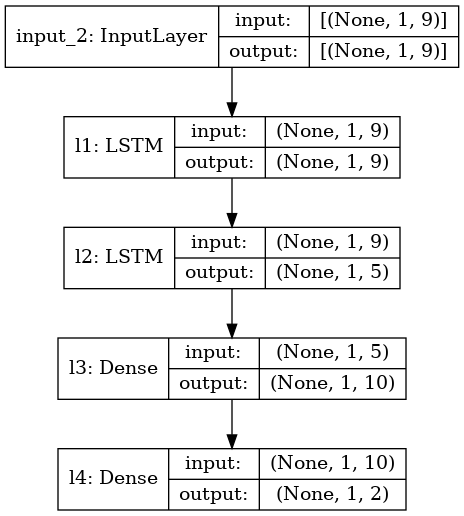

In [40]:
ut.fpm(mm)

In [41]:
xr = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
yr = y_train.reshape((y_train.shape[0], 1, 2))

In [42]:
xr.shape, yr.shape

((188, 1, 9), (188, 1, 2))

In [44]:
%%time
hist = mm.fit(xr, yr, epochs=1000, batch_size=5, verbose=1,)

Epoch 1/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4390 - accuracy: 0.8245
Epoch 2/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4384 - accuracy: 0.8245
Epoch 3/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4382 - accuracy: 0.8245
Epoch 4/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4404 - accuracy: 0.8245
Epoch 5/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4400 - accuracy: 0.8245
Epoch 6/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4397 - accuracy: 0.8245
Epoch 7/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4391 - accuracy: 0.8245
Epoch 8/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4385 - accuracy: 0.8245
Epoch 9/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4370 - accuracy: 0.8245
Epoch 10/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4377 - accuracy: 0.8245

38/38 [==============================] - 0s 6ms/step - loss: 0.4087 - accuracy: 0.8191
Epoch 163/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4094 - accuracy: 0.8191
Epoch 164/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4145 - accuracy: 0.8404
Epoch 165/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4131 - accuracy: 0.8191
Epoch 166/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4092 - accuracy: 0.8298
Epoch 167/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4118 - accuracy: 0.8298
Epoch 168/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4086 - accuracy: 0.8191
Epoch 169/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8298
Epoch 170/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4145 - accuracy: 0.8351
Epoch 171/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.

38/38 [==============================] - 0s 6ms/step - loss: 0.4038 - accuracy: 0.8404
Epoch 323/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.4007 - accuracy: 0.8457
Epoch 324/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3985 - accuracy: 0.8457
Epoch 325/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.4022 - accuracy: 0.8457
Epoch 326/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.3977 - accuracy: 0.8404
Epoch 327/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3973 - accuracy: 0.8404
Epoch 328/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.4001 - accuracy: 0.8457
Epoch 329/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3981 - accuracy: 0.8351
Epoch 330/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.4024 - accuracy: 0.8351
Epoch 331/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3968 - accuracy: 0.

38/38 [==============================] - 0s 6ms/step - loss: 0.3936 - accuracy: 0.8404
Epoch 483/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3929 - accuracy: 0.8457
Epoch 484/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3945 - accuracy: 0.8351
Epoch 485/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.3943 - accuracy: 0.8457
Epoch 486/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4018 - accuracy: 0.8404
Epoch 487/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3928 - accuracy: 0.8404
Epoch 488/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3933 - accuracy: 0.8351
Epoch 489/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3896 - accuracy: 0.8351
Epoch 490/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.3926 - accuracy: 0.8351
Epoch 491/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.3928 - accuracy: 0.

38/38 [==============================] - 0s 6ms/step - loss: 0.3865 - accuracy: 0.8511
Epoch 643/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3895 - accuracy: 0.8511
Epoch 644/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3906 - accuracy: 0.8457
Epoch 645/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3873 - accuracy: 0.8404
Epoch 646/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3893 - accuracy: 0.8351
Epoch 647/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3927 - accuracy: 0.8404
Epoch 648/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3899 - accuracy: 0.8511
Epoch 649/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3863 - accuracy: 0.8404
Epoch 650/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3869 - accuracy: 0.8457
Epoch 651/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3866 - accuracy: 0.

38/38 [==============================] - 0s 6ms/step - loss: 0.3807 - accuracy: 0.8511
Epoch 803/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3839 - accuracy: 0.8457
Epoch 804/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3816 - accuracy: 0.8351
Epoch 805/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3795 - accuracy: 0.8511
Epoch 806/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3788 - accuracy: 0.8511
Epoch 807/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3824 - accuracy: 0.8457
Epoch 808/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3803 - accuracy: 0.8404
Epoch 809/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3797 - accuracy: 0.8404
Epoch 810/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3825 - accuracy: 0.8457
Epoch 811/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3859 - accuracy: 0.

38/38 [==============================] - 0s 6ms/step - loss: 0.3786 - accuracy: 0.8511
Epoch 963/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3833 - accuracy: 0.8351
Epoch 964/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3767 - accuracy: 0.8511
Epoch 965/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3845 - accuracy: 0.8457
Epoch 966/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3819 - accuracy: 0.8404
Epoch 967/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3794 - accuracy: 0.8457
Epoch 968/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3778 - accuracy: 0.8404
Epoch 969/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3762 - accuracy: 0.8457
Epoch 970/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3780 - accuracy: 0.8245
Epoch 971/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3792 - accuracy: 0.

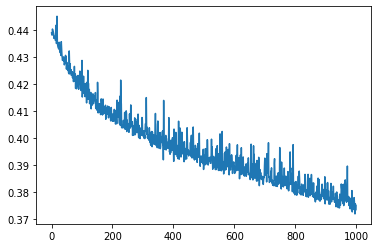

In [45]:
plt.plot(hist.history['loss'])

In [59]:
y_test[:,0];

In [58]:
y_test[:,1];

In [48]:
xr = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
yp = mm.predict(xr)

In [49]:
yp;

In [60]:
yp[:,0,1].max(), yp[:,0,1].min() 

(0.9940263, 4.9854706e-14)

In [56]:
yp[:,0,0];

In [57]:
yp[:,0,1];

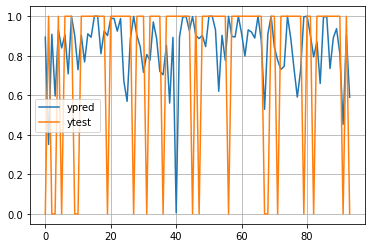

In [61]:
ll = []
plt.plot(yp[:,0,0], markersize=20)
ll.append('ypred')
plt.plot(y_test[:,0], markersize=20)
ll.append('ytest')
plt.legend(ll)
plt.grid()

* `1p` : predicted, `0p`: test classes
* `1t` : from test, `0t` : test classes

* the `t`, and `p` stand for test and predicted

In [62]:
dr = pd.DataFrame({'1p':yp[:,0,0], '1t':y_test[:,0], 
                  '0p':yp[:,0,1], '0t':y_test[:,1],})

These plots clearly show that, the dataset requires some spread around the delta functions as explained

array([[<AxesSubplot:title={'center':'0p'}>,
        <AxesSubplot:title={'center':'0t'}>]], dtype=object)

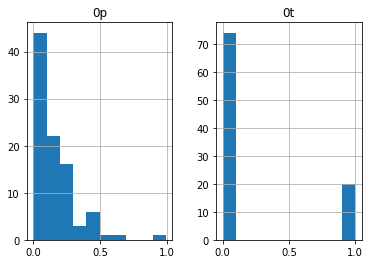

In [63]:
dr[['0p','0t']].hist()

array([[<AxesSubplot:title={'center':'1p'}>,
        <AxesSubplot:title={'center':'1t'}>]], dtype=object)

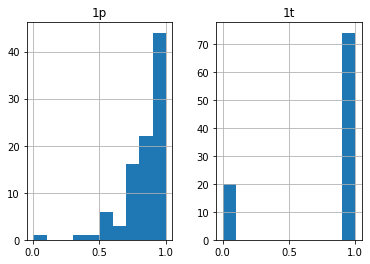

In [65]:
dr[['1p','1t']].hist()

these functions are understood as the prediction getting closer to 0 or 1 based on some thresholds thats put by hand

In [79]:
def gn(x):
    if x < 0.01 :
        return 0
    return -1


def fn(x):
    if x > 0.8 :
        return 1
    return -1

In [80]:
dr['1pp'] = dr['1p'].apply(fn)
dr['0pp'] = dr['0p'].apply(gn)

In [81]:
dr

1p  1t        0p  0t  1pp  0pp
0   0.894325   0  0.105675   1    1   -1
1   0.351334   1  0.648666   0   -1   -1
2   0.908796   0  0.091204   1    1   -1
3   0.596553   0  0.403447   1   -1   -1
4   0.928450   1  0.071550   0    1   -1
..       ...  ..       ...  ..  ...  ...
89  0.937111   1  0.062889   0    1   -1
90  0.810404   1  0.189596   0    1   -1
91  0.453060   0  0.546940   1   -1   -1
92  0.903719   1  0.096281   0    1   -1
93  0.590152   0  0.409848   1   -1   -1

[94 rows x 6 columns]

In [82]:
import collections as cll
cll.Counter(dr['1pp'])

Counter({1: 66, -1: 28})

In [83]:
cll.Counter(dr['0pp'])

Counter({-1: 76, 0: 18})

In [87]:
d1 = dr[ dr['1pp'] >= 0 ]

In [88]:
d0 = dr[ dr['0pp'] >= 0 ]

In [94]:
d1['0pp'].unique()

array([-1,  0])

In [91]:
d1['1pp'].unique()

array([1])

In [90]:
d1['1pp'].to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [95]:
d1['1t'].to_numpy()

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

<AxesSubplot:>

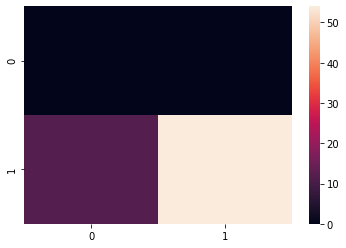

In [106]:
sns.heatmap(confusion_matrix(d1['1pp'].to_numpy(),d1['1t'].to_numpy()))